<a href="https://colab.research.google.com/github/kunal-git-002/pose-estimation/blob/master/pt1_pose_estimation_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [197]:

POSE_PAIRS = [ ["Head", "Neck"], ["Neck", "RShoulder"], ["RShoulder", "RElbow"],
             ["RElbow", "RWrist"], ["Neck", "LShoulder"], ["LShoulder", "LElbow"],
             ["LElbow", "LWrist"], ["Neck", "Chest"], ["Chest", "RHip"], ["RHip", "RKnee"],
             ["RKnee", "RAnkle"], ["Chest", "LHip"], ["LHip", "LKnee"], ["LKnee", "LAnkle"] ]
 

In [198]:
protoFile="/content/drive/My Drive/pose detection/model/pose_deploy_linevec.prototxt.txt"
weightsFile="/content/drive/My Drive/pose detection/model/pose_iter_440000.caffemodel"



net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)




In [199]:
image1=cv2.imread("/content/drive/My Drive/pose detection/model/pose5.jpg")

h,w,c=image1.shape



In [200]:
# Fix the input Height and get the width according to the Aspect Ratio

inHeight = 368

inWidth = int((inHeight/h)*w)


In [201]:

inpBlob = cv2.dnn.blobFromImage(image1,
                                1.0 / 255, 
                                (inWidth, inHeight),
                                (0, 0, 0),
                                swapRB=False, 
                                crop=False)


In [202]:
net.setInput(inpBlob)

out= net.forward()


In [203]:

BODY_PARTS={"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}

In [204]:
points=[]
for i in range(len(BODY_PARTS)):
    # Slice heatmap of corresponging body's part.
    heatMap = out[0, i, :, :]
 
    # Originally, we try to find all the local maximums. To simplify a sample
    # we just find a global one. However only a single pose at the same time
    # could be detected this way.
    _, conf, _, point = cv2.minMaxLoc(heatMap)
    x = (w * point[0]) / out.shape[3]
    y = (h * point[1]) / out.shape[2]
 
    # Add a point if it's confidence is higher than threshold.
    points.append((int(x), int(y)) if conf > 0.1 else None)


In [205]:

frame=image1
for pair in POSE_PAIRS:
    partFrom = pair[0]
    partTo = pair[1]
    assert(partFrom in BODY_PARTS)
    assert(partTo in BODY_PARTS)
 
    idFrom = BODY_PARTS[partFrom]
    idTo = BODY_PARTS[partTo]
    if points[idFrom] and points[idTo]:
        cv2.line(frame, points[idFrom], points[idTo], (255,0,0), 3)
        cv2.ellipse(frame, points[idFrom], (4, 4), 0, 0, 360, (0,255,0), cv2.FILLED)
        cv2.ellipse(frame, points[idTo], (4, 4), 0, 0, 360, (0,0,255), cv2.FILLED)
        cv2.putText(frame, str(idFrom), points[idFrom], cv2.FONT_HERSHEY_SIMPLEX,2, (0,0,0),2,cv2.LINE_AA)
        cv2.putText(frame, str(idTo), points[idTo], cv2.FONT_HERSHEY_SIMPLEX,2, (0,255,255),2,cv2.LINE_AA)




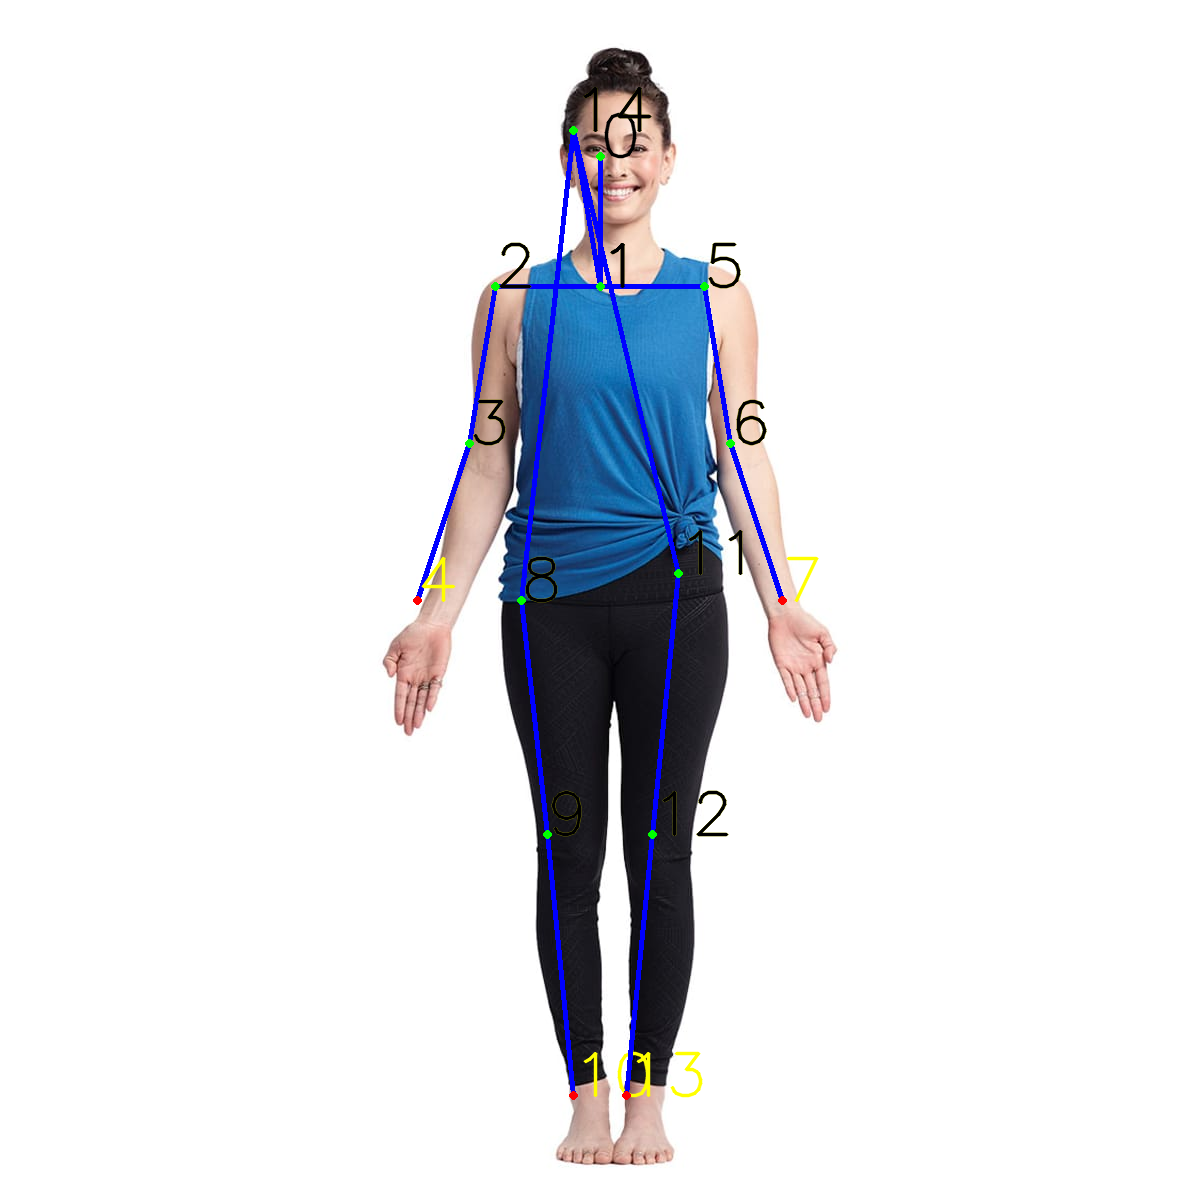

In [206]:
cv2_imshow(frame)

BODY_PARTS={"Head": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
"LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
"RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "Chest": 14,
"Background": 15}